# Jungnangcheon river
### We will study how precipitation, solar radiation, air preassure or Temperatures have effect on the river biochemical oxygen demand (BOD).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Data

In [4]:
jungnangcheon_df = pd.read_excel('./readonly/Data.xlsx')
date = jungnangcheon_df['Date']
y    = jungnangcheon_df['BOD(mg/L)']
X    = jungnangcheon_df[['Temperature (°C)', 'Precipitation (mm)', 'Air Pressure (hPa)', 'Solar Radiation (MJ/m2)']]
# print(jungnangcheon_df.isna().sum())
# print(jungnangcheon_df.keys())
jungnangcheon_df.describe()

,BOD(mg/L),Temperature (°C),Precipitation (mm),Air Pressure (hPa),Solar Radiation (MJ/m2)
count,76.000000,76.000000,76.000000,76.000000,76.000000
mean,4.065789,15.797368,3.822368,1004.950000,16.073026
std,2.345296,8.732468,14.665848,8.580295,6.981285
min,1.400000,-4.400000,0.000000,987.300000,2.720000
25%,2.475000,9.125000,0.000000,998.325000,11.175000
50%,3.500000,17.100000,0.000000,1004.150000,15.865000
75%,5.400000,23.000000,0.000000,1011.575000,21.570000
max,12.000000,30.400000,103.100000,1025.300000,27.470000


## Plot correlations

['Temperature (°C)', 'Precipitation (mm)', 'Air Pressure (hPa)', 'Solar Radiation (MJ/m2)']


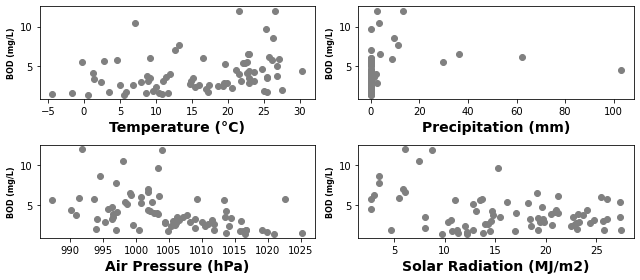

Correlation coeff (BOD and  Temperature (°C)  =  0.3
Correlation coeff (BOD and  Precipitation (mm)  =  0.22
Correlation coeff (BOD and  Air Pressure (hPa)  =  -0.46
Correlation coeff (BOD and  Solar Radiation (MJ/m2)  =  -0.33


In [5]:

feature_name = list(X.keys())
print(feature_name)

fig = plt.figure(figsize=(9,4))
for i in range(0, len(feature_name)):
    ax = fig.add_subplot(2, 2, i+1)
    plt.scatter(jungnangcheon_df[feature_name[i]], jungnangcheon_df['BOD(mg/L)'], color='grey')
    plt.xlabel(feature_name[i], size=14, weight='bold')
    plt.ylabel('BOD (mg/L)', size=8, weight='bold')
    plt.tight_layout()
plt.show()
for feature in feature_name:
    print('Correlation coeff (BOD and ', feature, ' = ', np.corrcoef(jungnangcheon_df[feature], jungnangcheon_df['BOD(mg/L)'])[1][0].round(2))


#### As we can see here, input variables are not strongly correlated with BOD, only Air preassure has a weak correlation.

## Linear Regression model
#### This will be our first and simplest model

M_RMSE:  2.32 
M_R2:  -0.47


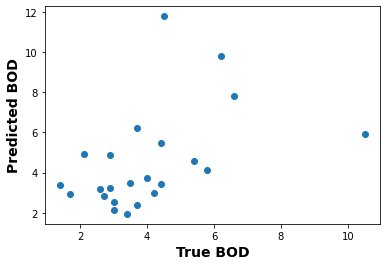

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Build the model
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=101)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Evaluate the performance
y_m_predict = linreg.predict(X_test)
m_rmse = round((np.sqrt(mean_squared_error(y_test, y_m_predict))), 2)
m_r2 = round(r2_score(y_test, y_m_predict), 2)
print('M_RMSE: ', m_rmse, '\nM_R2: ', m_r2)

# Plot the predictions
plt.scatter(y_test, y_m_predict)
plt.xlabel('True BOD', size=14, weight='bold')
plt.ylabel('Predicted BOD', size=14, weight='bold')
plt.show()

## Decision Tree
#### Decision tree is a simple but powerful and easy to interpretate Machine learning algorithm. We will see the behaviour and decision making.

Accuracy of Decision Tree classifier on training set: 0.73
Accuracy of Decision Tree classifier on test set: 0.14


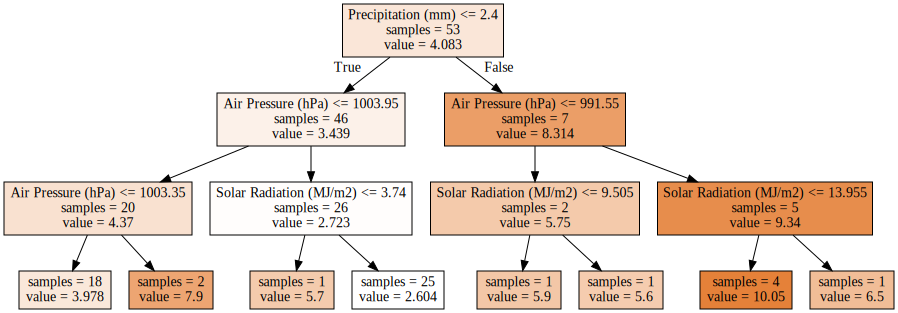

In [7]:
from sklearn.tree import DecisionTreeRegressor
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances
# %conda install graphviz

tree = DecisionTreeRegressor(random_state=0, max_depth = 3).fit(X_train, y_train) # Add max depth to reduce overfitting
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(tree.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(tree.score(X_test, y_test)))

plot_decision_tree(tree, X.keys(), y.keys())

#### The decision tree model is too overfitted as we can see here. We could set max_depth=1 but it would only take Precipitation value to make the predictions.
#### This are the most used parameters:

Feature importances: [0.         0.60039158 0.31917918 0.08042924]


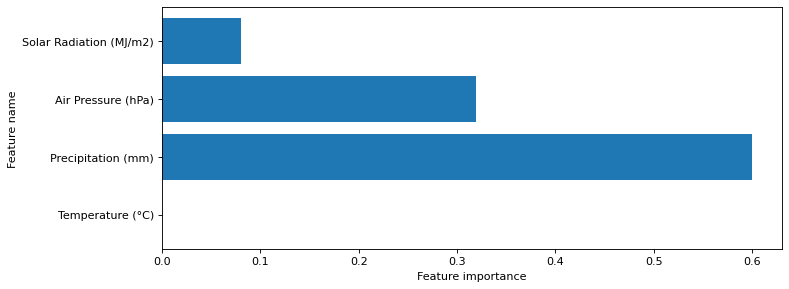

In [8]:
plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(tree, X.keys())

print('Feature importances: {}'.format(tree.feature_importances_))

# Random Forest
#### Takes multiple individual learning tree models and combines them to produce more powerful aggregate model.

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

forest = RandomForestRegressor(n_estimators=100, max_features=2, random_state=0).fit(X_train, y_train)
y_predict = forest.predict(X_test) 

# Evaluate the model
errors = abs(y_predict - y_test)        # Compute absolute errors
# print(list(zip(y_predict, y_test)))
# Mean absolute error (MAE). Mean distance between predited and real values.
print('Mean Absolute Error:', round(np.mean(errors), 4), 'degrees.')

# Mean absolute percentage error (MAPE) and accuracy
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 4), '%.')

Mean Absolute Error: 1.2251 degrees.
Accuracy: 66.6785 %.
